In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
IMGSZ = 256
B_SIZE = 32
CHANNEL_SIZE = 3
EPOCHS = 25

In [12]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    "GRAPE DATASET",
    image_size=(IMGSZ,IMGSZ),
    shuffle=True,
    batch_size=B_SIZE
)

Found 7432 files belonging to 4 classes.


In [13]:
CLASS_NAMES = datasets.class_names
CLASS_NAMES

['Grape___Leaf_blight',
 'Grape___black_measles',
 'Grape___black_rot',
 'Grape___healthy']

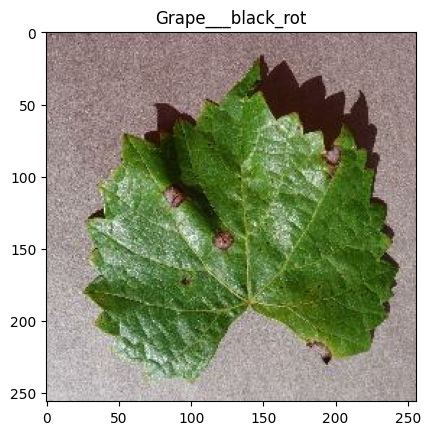

In [14]:
for image_batch, label_batch in datasets.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[label_batch[0]])

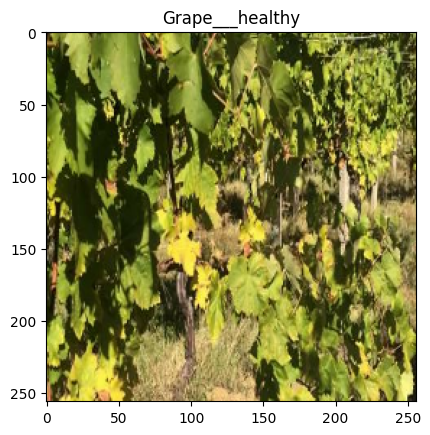

In [15]:
for image_batch, label_batch in datasets.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[label_batch[0]])

In [16]:
def get_train_test_eval_dataset(datasets, train_size=0.8, val_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):
    assert (train_size + test_size + val_size) == 1
    
    ds_size = len(datasets)
    
    if shuffle:
        datasets = datasets.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_size * ds_size)
    val_size = int(val_size * ds_size)
    
    train_dataset = datasets.take(train_size)    
    val_dataset = datasets.skip(train_size).take(val_size)
    test_dataset = datasets.skip(train_size).skip(val_size)
    
    return train_dataset, val_dataset, test_dataset

train_dataset, val_dataset, test_dataset = get_train_test_eval_dataset(datasets)

print("LENGTH OF TRAIN DATASET : ",len(train_dataset))
print("LENGTH OF TEST DATASET : ",len(test_dataset))
print("LENGTH OF EVAL DATASET : ",len(val_dataset))

LENGTH OF TRAIN DATASET :  186
LENGTH OF TEST DATASET :  24
LENGTH OF EVAL DATASET :  23


In [17]:
train_dataset = train_dataset.cache().shuffle(1000)
test_dataset = test_dataset.cache().shuffle(1000)
val_dataset = val_dataset.cache().shuffle(1000)

In [18]:
resize_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMGSZ,IMGSZ),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

model = tf.keras.Sequential([
    resize_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape = (IMGSZ,IMGSZ,CHANNEL_SIZE)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(4,activation="softmax")

])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history_rec = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=B_SIZE,
    verbose=1,
    validation_data=val_dataset
)

Epoch 1/25
186/186 [==============================] - 394s 2s/step - loss: 0.9288 - accuracy: 0.5870 - val_loss: 0.5873 - val_accuracy: 0.7717
Epoch 2/25
186/186 [==============================] - 319s 2s/step - loss: 0.3572 - accuracy: 0.8694 - val_loss: 0.4843 - val_accuracy: 0.8098
Epoch 3/25
186/186 [==============================] - 312s 2s/step - loss: 0.2349 - accuracy: 0.9145 - val_loss: 0.4315 - val_accuracy: 0.8478
Epoch 4/25
186/186 [==============================] - 333s 2s/step - loss: 0.1764 - accuracy: 0.9335 - val_loss: 0.2034 - val_accuracy: 0.9226
Epoch 5/25
186/186 [==============================] - 309s 2s/step - loss: 0.1189 - accuracy: 0.9566 - val_loss: 0.1508 - val_accuracy: 0.9334
Epoch 6/25
186/186 [==============================] - 310s 2s/step - loss: 0.0963 - accuracy: 0.9668 - val_loss: 0.1365 - val_accuracy: 0.9348
Epoch 7/25
186/186 [==============================] - 304s 2s/step - loss: 0.0974 - accuracy: 0.9658 - val_loss: 0.1335 - val_accuracy: 0.9497

In [20]:
accuracy_pm = history_rec.history['accuracy']
loss_pm = history_rec.history['loss']
val_accuracy_pm = history_rec.history['val_accuracy']
val_loss_pm = history_rec.history['val_loss']

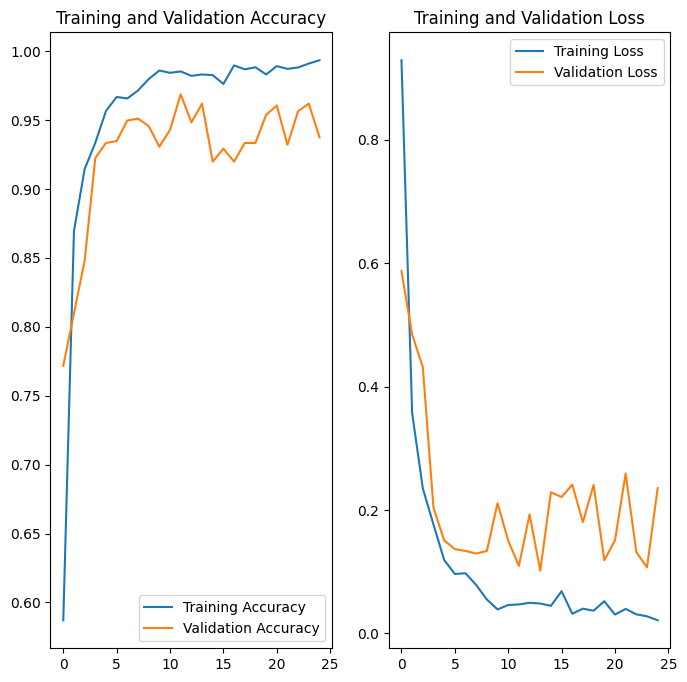

In [21]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy_pm, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy_pm, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_pm, label='Training Loss')
plt.plot(range(EPOCHS), val_loss_pm, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.evaluate(test_dataset)

24/24 [==============================] - 67s 841ms/step - loss: 0.1812 - accuracy: 0.9505


[0.1812126189470291, 0.9505208134651184]

1/1 [==============================] - 0s 57ms/step


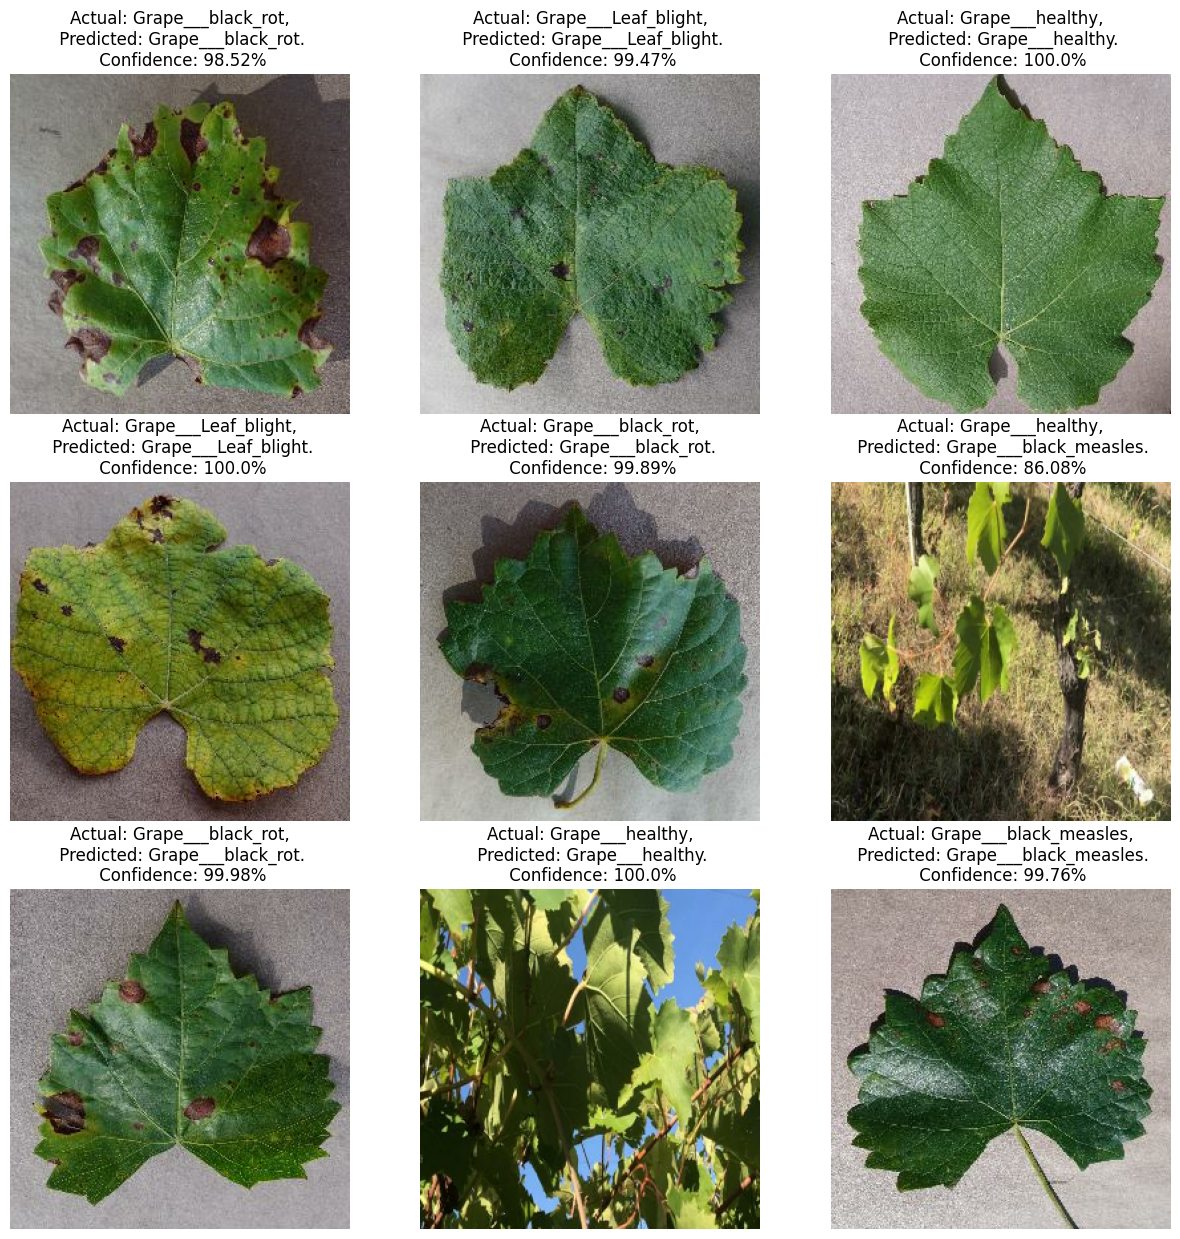

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        IMG = images[i].numpy()
        plt.imshow(IMG.astype("uint8"))

        img_array = tf.expand_dims(IMG, 0)
        predictions = model.predict(img_array)

        predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        actual_class = CLASS_NAMES[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [24]:
model_version = 8
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/8\assets


INFO:tensorflow:Assets written to: ./models/8\assets
